In [1]:
import pandas as pd 
init_df = pd.read_parquet("/a/scratch/alexm/research/mostrecent/gdb9_sto3g_converged.parquet")

In [2]:
init_df

,smile,atom_positions,hlgap
0,NC=C(C=CC=O)C#N,"[-4.6443071378757415, -0.20404282270892277, -3...",2.140608
1,NCC#Cc1c[nH]nn1,"[6.0551210867647605, 1.231421557468469, 1.3027...",6.057728
2,N=C1CC(NC=O)=NN1,"[-5.575746050475118, 0.10778378863930606, -1.4...",5.244358
3,NC1C=C(F)C(F)C1F,"[3.9393057519100565, 0.04158247251484597, 0.56...",6.501084
4,CON=CC(C=O)=NO,"[5.852566316629086, -0.13053310990125, -0.2363...",3.952413
...,...,...,...
443475,NC1CC=CC2CC12N,"[-2.2813424026980695, -3.4155161626061767, 0.2...",6.341937
443476,CCC1N=CNC12CC2,"[5.164756344884526, -0.10817491930027225, -0.4...",6.640875
443477,CC(N)C(O)C(F)CO,"[-4.032985048718895, -1.5481892939251802, -1.8...",10.226885
443478,CN1CC1CC(O)CF,"[4.411501023747726, 1.032034092043031, 2.00537...",9.745535


In [4]:
a = init_df["atom_positions"].values[0]

In [5]:
import hashlib

# 300M
#sha = df["atom_positions"].apply( lambda x: hashlib.sha256(x.encode("utf-8")).hexdigest() )
sha = init_df["atom_positions"].apply( lambda x: hash(x)  )

newdf = pd.DataFrame({"hash":  sha, "hlgap": init_df["hlgap"], "smiles": init_df["smile"]}) # 35MB
#newdf = pd.DataFrame({"sha":  sha, "hlgap": df["hlgap"], "smiles": df["smile"]})
#newdf = pd.DataFrame({"hlgap": df["hlgap"], "smiles": df["smile"]}) # 8.5 MB  ;; sha part is 35-8.5 ;; 
#newdf = pd.DataFrame({"smiles": df["smile"]}) # 5.2MB

In [6]:
newdf.to_parquet("test.parquet")

In [7]:
!ls -lahS *.parquet

-rw-r--r-- 1 alexm all 368M Apr 24 20:32 gdb9_sto3g_converged.parquet
-rw-r--r-- 1 alexm all  13M Apr 25 15:24 test.parquet


In [8]:
df = pd.read_parquet("test.parquet")

In [9]:
df

,hash,hlgap,smiles
0,156596618283513934,2.140608,NC=C(C=CC=O)C#N
1,-3707069546237844027,6.057728,NCC#Cc1c[nH]nn1
2,5998152005141697402,5.244358,N=C1CC(NC=O)=NN1
3,-845469491875471239,6.501084,NC1C=C(F)C(F)C1F
4,3898573328132582055,3.952413,CON=CC(C=O)=NO
...,...,...,...
443475,900754180145602411,6.341937,NC1CC=CC2CC12N
443476,-4182744942906333601,6.640875,CCC1N=CNC12CC2
443477,-4233229871837779534,10.226885,CC(N)C(O)C(F)CO
443478,110774920181189188,9.745535,CN1CC1CC(O)CF


In [72]:
import numpy as np 
np.random.seed(42)
from rdkit import Chem  
from rdkit.Chem import AllChem

angstrom_to_bohr = 1.88973
from rdkit import RDLogger
lg = RDLogger.logger()
lg.setLevel(RDLogger.CRITICAL)

smile = df["smiles"].values[0]

b = Chem.MolFromSmiles(smile)
#b = Chem.AddHs(b, explicitOnly=True)   
b = Chem.AddHs(b, explicitOnly=False)   

AllChem.EmbedMolecule(b, randomSeed=42)

atoms = [atom.GetSymbol() for atom in b.GetAtoms()]
locs =  b.GetConformer().GetPositions() * angstrom_to_bohr  

print(init_df["atom_positions"].values[0])
print(str(locs.reshape(-1)))

print(hash(str(locs.reshape(-1))))
print(df["sha"].values[0])

[-4.6443071378757415, -0.20404282270892277, -3.527316892837064, -2.7066084679987332, 0.010974000612061843, -1.9738750379384231, -0.8475957351659058, 0.21659219620438502, -0.4837215510935497, 1.1529432465632152, 0.43791993976176125, 1.1198944199113177, 2.719970600605892, -1.5784282628395514, 1.5691991084446368, 4.808638315701837, -1.3255790824610738, 3.2466063577177238, 6.322061866626751, -3.099754742489184, 3.7496777140792723, -1.303573646698604, 3.5511696434399442, -0.7125423125829743, -1.59014952916493, 5.786833782712475, -0.8362261770891022, -4.43422991115357, 0.2590621796426656, -5.4866704400882105, -6.518793831043894, -0.8036756791347506, -3.130246147711174, -2.193523463068222, -2.5909548942558214, -2.2622542612114347, 1.800223393172404, 2.101656917666039, 2.2139779618914317, 2.31778607350205, -3.288840729973634, 0.5920063871423761, 5.117158226206744, 0.5270675541450405, 4.1559818979398555]
[-3.26471638  0.89523054 -2.76715811 -2.53281017 -1.14965987 -1.03458091
 -0.48157955 -1.02

In [10]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_3d = True
import py3Dmol
from rdkit.Chem import rdDepictor
from rdkit.Chem import rdDistGeom
import rdkit
print(rdkit.__version__)

2022.09.5


In [11]:
smile = df["smiles"].values[0]

In [74]:
!pip install py3Dmol

In [ ]:
# conformers 

In [12]:
b = Chem.MolFromSmiles(smile)

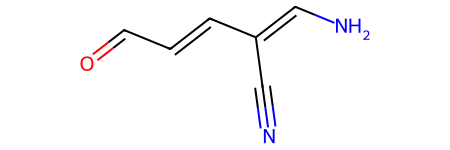

In [13]:
b

In [14]:
b = Chem.AddHs(b) # <- add hydrogens so that we get a reasonable conformer
rdDistGeom.EmbedMolecule(b)

0

In [15]:
rdDistGeom.EmbedMultipleConfs(b,10, randomSeed=0xf00d) # <- generate 10 conformers


In [87]:
import py3Dmol

In [20]:
IPythonConsole.drawMol3D(b, confId=3) # compress using hash
#https://greglandrum.github.io/rdkit-blog/posts/2023-02-04-working-with-conformers.html

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [33]:
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles(smile)
b = Chem.AddHs(b) # <- add hydrogens so that we get a reasonable conformer
AllChem.EmbedMultipleConfs(mol, numConfs=10)
#confs = Chem.MolToConformations(mol, ids=list(range(10)))
confs = [a for a in mol.GetConformers()]

# For gdb11 may be able to do 631g and full grid-size?

ref_conf = confs[0]
for i in range(1, len(confs)):
    rmsd = rdkit.Chem.rdMolAlign.GetBestAlignmentTransform(confs[i], ref_conf)
    if rmsd < 0.1:
        print(f"Conformers {i} and 0 are identical up to rotation")

[15:33:04] Molecule does not have explicit Hs. Consider calling AddHs()


ArgumentError: Python argument types in
    rdkit.Chem.rdMolAlign.GetBestAlignmentTransform(Conformer, Conformer)
did not match C++ signature:
    GetBestAlignmentTransform(RDKit::ROMol prbMol, RDKit::ROMol refMol, int prbCid=-1, int refCid=-1, boost::python::api::object map=[], int maxMatches=1000000, bool symmetrizeConjugatedTerminalGroups=True, boost::python::api::object weights=[], bool reflect=False, unsigned int maxIters=50)

In [32]:
print(confs)

SyntaxError: invalid syntax (331280142.py, line 1)

In [45]:
import numpy as np 
from rdkit import Chem
from rdkit.Chem import AllChem

mol = Chem.MolFromSmiles(smile)
AllChem.EmbedMultipleConfs(mol, numConfs=10)
confs = mol.GetConformers()

ref_conf = confs[0]
x = ref_conf.GetPositions()
for i in range(1, len(confs)):
    #confs[0].rmsd = AllChem.GetBestRMS(confs[i], ref_conf)
    y = confs[i].GetPositions()

    print(x.shape, y.shape)

    U, s, V = np.linalg.svd(x.T @ y)
    w = U @ V.T

    print(np.linalg.norm( x @ w - y))
    IPythonConsole.drawMol3D(b, confId=i) # compress using hash

    #if rmsd < 0.1:
    #    print(f"Conformers {i} and 0 are identical up to rotation")

(9, 3) (9, 3)
10.160331793512002


[15:42:46] Molecule does not have explicit Hs. Consider calling AddHs()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
9.280561785196037


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
5.447868372060003


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
5.7870999999090715


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
9.78454871905888


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
9.92793313193198


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
2.9693448278298558


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
5.650994983435064


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

(9, 3) (9, 3)
5.300531590637019


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol